# **Customer Churn Prediction for a Telecommunications Company**

**Objective:**
*   Build a model that predicts the likelihood of telecommunication customers ending their subscription (churning) based on their historical data (e.g. gender, demographic, account, service usage, etc…)
*   This prediction should help a marketing team devise targeted interventions to retain customers at risk of churning, which might involve offering special promotions, addressing service pain points, etc

**Dataset:**
This dataset includes information about a sample of 7,043 customers of a telecommunications company, with 21 features like customer demographics, account information, and services used.

**Tools & Framework:**
**ProgrammingLanguage:** Python
**Libraries:** pandas, numpy, scikit-learn, matplotlib, seaborn

**Skills:** (1) Data collection, (2) Exploratory data analysis (EDA), (3) Data cleaning, (4) Descriptive Statistics (5) Data visualization, (6) Data Preprocessing, (7) Machine Learning (8) Evaluation

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,OneHotEncoder

In [ ]:
# 1. Data Collection
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 2. Exploratory Data Analysis (EDA)
# Checking the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Shape of Dataset
print(f"The dataset has {df.shape[0]} Rows and {df.shape[1]} columns")

The dataset has 7043 Rows and 21 columns


In [ ]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Null Values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# 3. Data Cleaning

# Missing Values
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# 4. Descriptive Statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [ ]:
# 5. Data Visualization

# Gender Distrbution
df.gender.value_counts().to_frame()

,count
gender,
Male,3555
Female,3488


In [ ]:
fig = px.pie(df, title="Gender Distribution",names="gender", color='gender', color_discrete_map={'Female': 'pink', 'Male': 'lightblue'})
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(title_x=0.5, title_font=dict(size=20, color='black'), template="plotly", width=450, height=450)
fig.add_annotation(text="Gender", showarrow=False, font=dict(size=20, color="black"), xref="paper", yref="paper", x=0.5, y=0.5)
fig.show()

In [ ]:
# Gender VS Churn
df.groupby(['Churn','gender'])['gender'].count()

Churn  gender
No     Female    2549
       Male      2625
Yes    Female     939
       Male       930
Name: gender, dtype: int64

In [ ]:
churn_summary = df.groupby(['gender', 'Churn']).size().reset_index(name='Count')
fig = px.bar(churn_summary, x='gender', y='Count', color='Churn', title='Gender VS Churn', text='Count', color_discrete_map={'Yes': 'lightcoral', 'No': 'mediumseagreen'})
fig.update_layout(title_x=0.5, title_font=dict(size=20, color='black'), template='plotly', barmode='group', xaxis_title='Gender', yaxis_title='Count', width=450, height=450)
fig.show()

In [ ]:
# 6. Data Preprocessing

# Converting categorical features into numeric
df.drop(['customerID'],axis=1,inplace=True)
columns = df.select_dtypes(include=['category','object']).columns
columns

# Transform Object Columns into Numbers
label_encoder = LabelEncoder()
data2 = df.copy()
for col in columns:
    data2[col] = label_encoder.fit_transform(data2[col])
data2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [ ]:
corr = data2.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


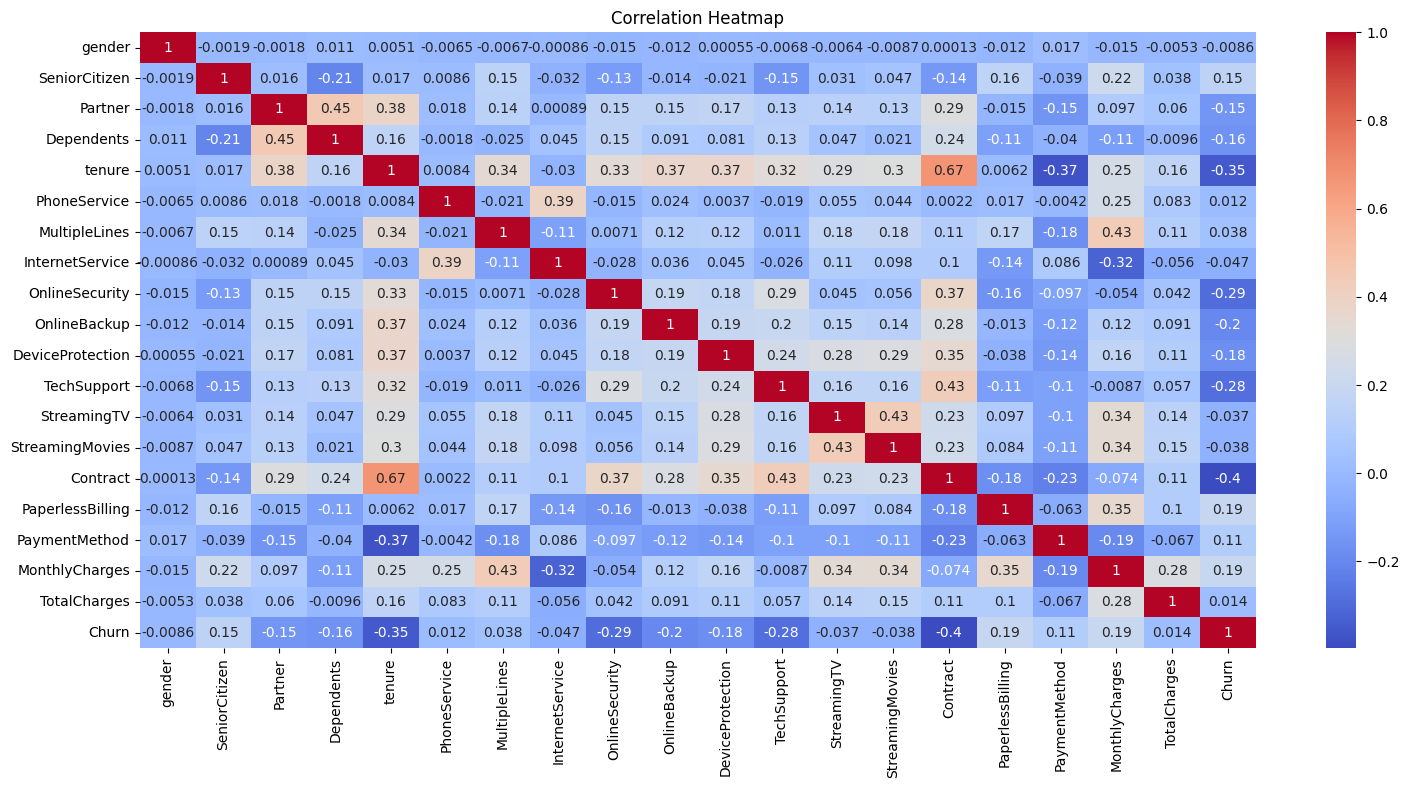

In [ ]:
# Correlation heatmap

# Select only numeric columns for correlation
numeric_df = data2.select_dtypes(include=['number'])

# Compute and plot the correlation heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 7. Machine Learning

### Split
X = data2.drop(['Churn'],axis=1)
y = data2['Churn']
keys = X.columns
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [ ]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [ ]:
# Scaling the features
scale = MinMaxScaler()
X = scale.fit_transform(X)
X = pd.DataFrame(X,columns=keys)
X.head()
#scaler = MinMaxScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
#X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.383614
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.224502
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.024043
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.214395
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.141654


In [ ]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle =True,stratify=y)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (4930, 19)
X_test shape is  (2113, 19)
y_train shape is  (4930,)
y_test shape is  (2113,)


In [ ]:
#CROSS VALIDATION
### Validation Score - The cross_val_score function calculates a performance metric (e.g., accuracy, precision, recall) for each fold.
### The final result is typically the mean of these scores, which provides an overall assessment of the model's performance.
### cross_val_score internally handles the fitting and evaluation of the model during each fold of cross-validation
from sklearn.model_selection import cross_val_score

models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, class_weight='balanced'),
    }

cv_results = {}
for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    try:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
        cv_results[model_name] = cv_scores.mean()
        print(f"Mean accuracy for {model_name}: {cv_scores.mean():.4f}")
    except Exception as e:
        print(f"Error with {model_name}: {e}")

Cross-validating RandomForest...
Mean accuracy for RandomForest: 0.7927
Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 0.7310
Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 0.7454


In [ ]:
cv_results_df = pd.DataFrame(list(cv_results.items()), columns=['Model', 'Mean Accuracy'])
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False)
cv_results_df

,Model,Mean Accuracy
0,RandomForest,0.792698
2,LogisticRegression,0.745436
1,DecisionTree,0.731034


In [ ]:
best_model_name = cv_results_df.iloc[0]['Model']
print(f"\nBest model from CV: {best_model_name}")


Best model from CV: RandomForest


In [ ]:
fig = px.bar(cv_results_df, x='Model', y='Mean Accuracy', title='Cross-Validation Accuracy for Different Models',text_auto=True, labels={'Mean Accuracy': 'Mean Accuracy'}, color='Mean Accuracy')
fig.update_layout(title_x=0.5, title_font=dict(size=15, color='black'), template="plotly", width=600, height=400)
fig.show()

In [ ]:
# Model 1: Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [ ]:
# Model 2: Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [ ]:
# Model 3: Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [ ]:
# 8. Model Evaluation

# Random Forest Evaluation
print("Random Forest Model Evaluation")
print("Accuracy: ", accuracy_score(y_test, rf_pred))
print("Classification Report: \n", classification_report(y_test, rf_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, rf_pred))

Random Forest Model Evaluation
Accuracy:  0.7846663511594889
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1552
           1       0.62      0.47      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.70      2113
weighted avg       0.77      0.78      0.77      2113

Confusion Matrix: 
 [[1393  159]
 [ 296  265]]


**Accuracy:** 0.7847 (or ~78.47%) means the model correctly predicted ~78.47% of the total instances in the dataset. However, accuracy alone is not sufficient, especially if the classes are imbalanced (which is true here with a larger number of 0s compared to 1s).

**Classification Report:** provides metrics for each class (0 and 1):

**Class 0 (Majority Class):**
*   Precision (0.82): Out of all instances predicted as class 0, 82% were correct.
*   Recall (0.90): Out of all actual class 0 instances, 90% were correctly predicted.
*   F1-Score (0.86): A harmonic mean of precision and recall, indicating good performance for class 0.

**Class 1 (Minority Class):**
*   Precision (0.62): Out of all instances predicted as class 1, 62% were correct.
*   Recall (0.47): Out of all actual class 1 instances, only 47% were correctly predicted.
*   F1-Score (0.54): Lower performance compared to class 0, suggesting difficulty in identifying class 1.

**Macro Average:** Takes the unweighted average of metrics across both classes.
F1-Score (0.70) reflects a performance imbalance between the two classes.

**Weighted Average:** Averages the metrics across classes, weighted by class support (number of instances).
Weighted F1-Score (0.77) aligns closely with the accuracy, reflecting the dominance of class 0.

**Confusion matrix:** shows how the predictions compare with the actual values:
*   True Positives (TP): 265 (Correctly predicted class 1)
*   True Negatives (TN): 1393 (Correctly predicted class 0)
*   False Positives (FP): 159 (Class 0 incorrectly predicted as class 1)
*   False Negatives (FN): 296 (Class 1 incorrectly predicted as class 0)


In [ ]:
# Logistic Regression Evaluation
print("\nLogistic Regression Model Evaluation")
print("Accuracy: ", accuracy_score(y_test, lr_pred))
print("Classification Report: \n", classification_report(y_test, lr_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, lr_pred))


Logistic Regression Model Evaluation
Accuracy:  0.8031235210601041
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.66      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113

Confusion Matrix: 
 [[1395  157]
 [ 259  302]]


In [ ]:
# Decision Tree Evaluation
print("\nDecision Tree Model Evaluation")
print("Accuracy: ", accuracy_score(y_test, dt_pred))
print("Classification Report: \n", classification_report(y_test, dt_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, dt_pred))


Decision Tree Model Evaluation
Accuracy:  0.7259820160908661
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1552
           1       0.48      0.50      0.49       561

    accuracy                           0.73      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.73      0.73      2113

Confusion Matrix: 
 [[1256  296]
 [ 283  278]]


### Using the Customer Churn Prediction Model to Predict Future Churn:
To effectively utilize the above trained Customer Churn Prediction model in real-world scenarios, we need to deploy it into a production environment where it can predict churn for new customer data as it arrives.

**Here's how an organization can implement this:**

---

### 1. **Deployment of the Model**
   - **Cloud Platforms**: Deploy the model to a cloud platform (e.g., AWS Sagemaker, Google Cloud AI, Azure ML).
   - **APIs**: Wrap the model in a REST API using frameworks like Flask or FastAPI, so it can accept new data and return predictions.
   - **Real-Time Data Integration**: Connect the API or deployed model with your organization’s real-time data pipeline (e.g., Kafka, AWS Kinesis).

---

### 2. **Integration with Real-Time Data**
   - **Data Flow**: Stream customer data (e.g., transactions, engagement, support logs) to a database or data warehouse in real-time.
   - **Preprocessing**: Apply the same preprocessing steps used during model training (e.g., converting categorical data, scaling).
   - **Prediction Pipeline**: Feed the preprocessed data into the deployed model for prediction.

---

### 3. **Drawing Predicted Visualizations**
To create actionable insights and visualize predictions, organizations can follow these steps:

#### **a. Data Storage and Analytics**
   - Store predictions in a centralized database.
   - Combine predictions with historical data to identify trends and behavior patterns.

#### **b. Dashboard Creation**
   - **Visualization Tools**: Use tools like Tableau, Power BI, or custom dashboards built with Python libraries (e.g., Dash, Plotly, or Matplotlib).
   - **Visualization Ideas**:
     - **Churn Probability Heatmap**: Visualize customers with a higher probability of churning.
     - **Segment Analysis**: Group customers by churn probability and plot retention strategies.
     - **Trend Charts**: Monitor real-time churn predictions over time to detect patterns.
     - **Geographical Distribution**: Map churn predictions to geographical regions to identify problem areas.

#### **c. Example Dashboard Metrics**
   - **Churn Rate**: Percentage of predicted churners vs. total customers.
   - **Risk Segmentation**: High, medium, and low churn risk segments.
   - **Retention Impact**: Estimate the financial impact of churn using predictive insights.

---

### 4. **Actionable Insights**
   Organizations can use these predictions for targeted actions:
   - **Retention Campaigns**: Focus on customers with high churn probabilities by offering discounts or personalized offers. Alertscan be triggered for customers with churn probabilities above a threshold (e.g., > 80%).
   - **Proactive Support**: Identify at-risk customers and assign them dedicated account managers or customer success teams.
   - **Revenue Forecasting**: Predict potential revenue loss from churn and plan mitigation strategies.

---

### 5. **Automating the Process**
   - Use **AutoML frameworks** (like MLflow, TFX, or Kubeflow) for automation.
   - Implement scheduled retraining of the model as new data accumulates, ensuring it remains accurate.
---

